In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [ ]:
!pip install matrixprofile

In [ ]:
X = np.load('scaled_array_X_test.npy',allow_pickle= True)

In [ ]:
X[0]

array([-0.00079618, -0.00079618, -0.00079618, ..., -0.01732382,
       -0.01732382, -0.01732382])

In [ ]:
Y = pd.read_csv('RavdessAudioOnlyNumpy__Y_test.csv')

In [ ]:
condition = (Y['actor'] == 24) & (Y['emotion'] == 'calm') & (Y['emotional_intensity']== 'normal') & (Y['statement'] == 'Kids are talking by the door') & (Y['vocal_channel']== 'speech')

In [ ]:
Y[condition]

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
524,audio-only,speech,calm,normal,Kids are talking by the door,1st,24,F,03-01-02-01-01-01-24.wav
525,audio-only,speech,calm,normal,Kids are talking by the door,2nd,24,F,03-01-02-01-01-02-24.wav


In [ ]:
X_1st = X[524]

In [ ]:
X_2st = X[525]

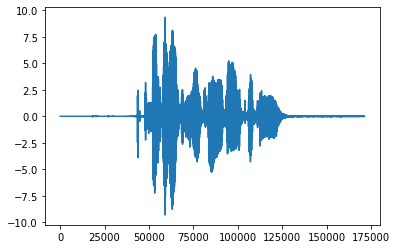

In [ ]:
plt.plot(X_1st)
plt.show()

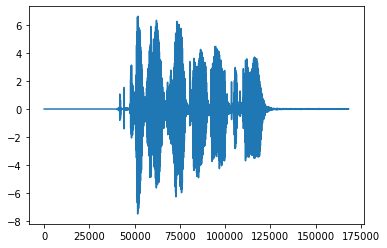

In [ ]:
plt.plot(X_2st)
plt.show()

In [ ]:
condition1 = (Y['actor'] == 23) & (Y['emotion'] == 'calm') & (Y['emotional_intensity']== 'normal') & (Y['statement'] == 'Kids are talking by the door') & (Y['vocal_channel']== 'speech')

In [ ]:
Y[condition1]

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
420,audio-only,speech,calm,normal,Kids are talking by the door,1st,23,M,03-01-02-01-01-01-23.wav
421,audio-only,speech,calm,normal,Kids are talking by the door,2nd,23,M,03-01-02-01-01-02-23.wav


In [ ]:
X_1stm = X[420]

In [ ]:
X_2stm = X[421]

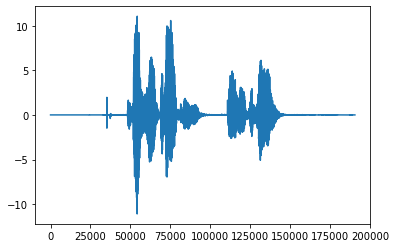

In [ ]:
plt.plot(X_1stm)
plt.show()

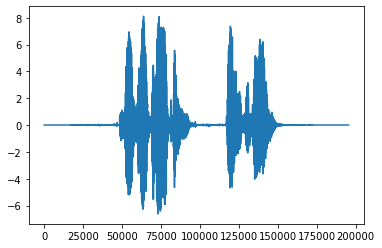

In [ ]:
plt.plot(X_2stm)
plt.show()

In [ ]:
!pip install stumpy


In [ ]:
import stumpy

In [ ]:
from tslearn.piecewise import PiecewiseAggregateApproximation

In [ ]:
paa = PiecewiseAggregateApproximation(n_segments=1000)
paa_transformed = paa.fit_transform([X_1st])

C:\Users\besso\Links\anaconda 3.5\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [ ]:
X_1st= np.squeeze(paa_transformed[0].T)

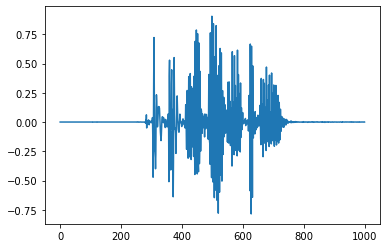

In [ ]:
plt.plot(X_1st)
plt.show()

In [ ]:
X_1st.shape

(1000,)

In [ ]:
columns = ['array']
df = pd.DataFrame(X_1st, columns= columns)

In [ ]:
df1 = df.drop(index=df.index[:250].union(df.index[851:]))
new_indices = range(len(df))
df1 = df.rename(index=dict(zip(df1.index, new_indices)))

In [ ]:
df1 = df1['array'].values

In [ ]:
df1= df1[250:851]

In [ ]:
!pip install matrixprofile

In [ ]:
from matrixprofile import *
import matrixprofile as mpx

In [ ]:
!pip install mass_ts

In [ ]:
!pip install matrixprofile-ts

In [ ]:
from matrixprofile import *

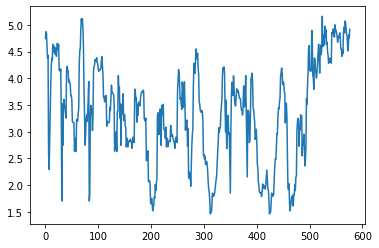

In [ ]:
w = 25
mp, mpi = matrixProfile.stomp(df1, w)

plt.plot(mp)
plt.show()

In [ ]:
mo, mod  = motifs.motifs(df1, (mp, mpi), max_motifs=5)

In [ ]:
mo


[[312, 407, 424],
 [203, 273, 343, 463, 491],
 [6, 31, 83, 141],
 [124, 382],
 [298, 325, 437]]

In [ ]:
mod

[1.4635832925532606,
 1.520294147618584,
 1.7054708774328924,
 2.1540902431136897,
 2.421950429273058]

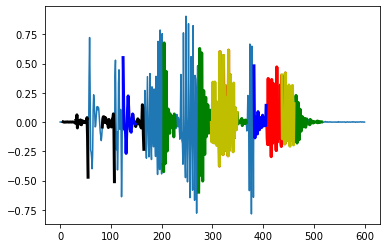

In [ ]:
plt.plot(df1)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df1[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

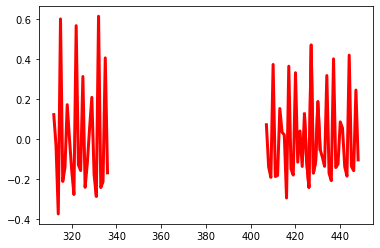

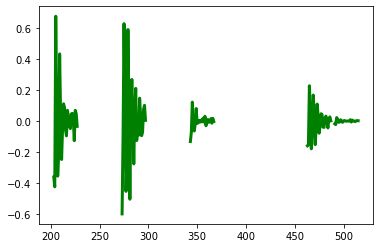

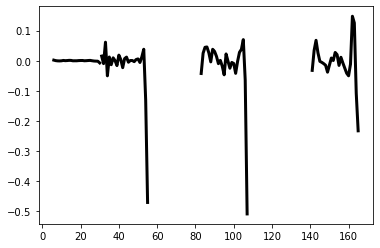

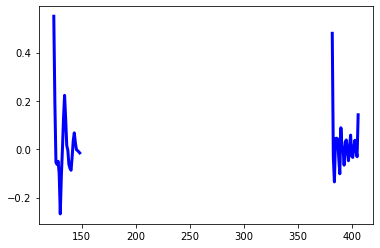

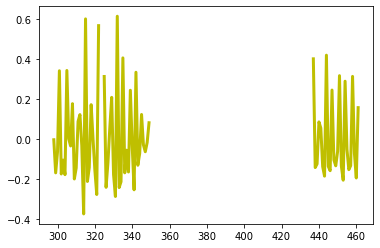

In [ ]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df1[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

In [ ]:
from matrixprofile.discords import discords

In [ ]:
anoms = discords(mp, ex_zone=20, k=5)

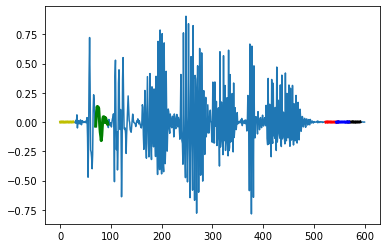

In [ ]:
plt.plot(df1)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = df1[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()